In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data sets/Assignment Data.csv')

In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,NaN,NaN
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,NaN,NaN,NaN
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,NaN,NaN
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,NaN,NaN,NaN
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,NaN,NaN,NaN


In [5]:
counts = df['variety'].copy().value_counts()
counts.shape

(707,)

In [6]:
# Removes the outliers from the dataset
df = df[df['variety'].notna()]
counts = df['variety'].value_counts()
to_remove = counts[counts<700].index
filterd_data = df[~df['variety'].isin(to_remove)]
filterd_data.head(4)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,NaN,NaN
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,NaN,NaN,NaN
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,NaN,NaN
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,NaN,NaN,NaN


In [7]:
df['variety'].value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64

In [8]:
# creating new df just for input and outpur
new_df = df[['description', 'variety']]
#checking the data description fot white blend catogaory 
new_df[new_df['variety']=='White Blend']

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
22,Delicate aromas recall white flower and citrus...,White Blend
26,Pretty aromas of yellow flower and stone fruit...,White Blend
32,"Part of the extended Calanìca series, this Gri...",White Blend
105,Made predominantly with Trebbiano and Malvasia...,White Blend
...,...,...
129841,This Bradgate blend of Chenin and Sauvignon Bl...,White Blend
129884,"After 23 months in barrel, this Viura-Malvasia...",White Blend
129899,"Aged entirely in stainless steel, this combine...",White Blend
129933,Bründlmayer makes a particularly felicitous br...,White Blend


In [9]:
new_df[new_df['variety']=='Riesling']

,description,variety
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
15,Zesty orange peels and apple notes abound in t...,Riesling
47,This is a sweet wine with flavors of white sug...,Riesling
76,Earthy pollen and mineral notes lend a savory ...,Riesling
85,"Pronounced dust, pollen and earth tones lend s...",Riesling
...,...,...
129918,"Despite plenty of honeyed sweetness, this wine...",Riesling
129923,"Thick, oily and sweet, this wine is clearly no...",Riesling
129924,Imagine honeyed orange sections—that's what th...,Riesling
129946,"Plump, clingy peach and honey notes are cut wi...",Riesling


In [10]:
data_categories = filterd_data['description'].groupby(filterd_data['variety'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

===========Original Categories =======================
Cat:1 Barbera : 721
Cat:2 Bordeaux-style Red Blend : 6915
Cat:3 Bordeaux-style White Blend : 1066
Cat:4 Cabernet Franc : 1353
Cat:5 Cabernet Sauvignon : 9472
Cat:6 Champagne Blend : 1396
Cat:7 Chardonnay : 11753
Cat:8 Gamay : 1025
Cat:9 Gewürztraminer : 1012
Cat:10 Glera : 709
Cat:11 Grüner Veltliner : 1345
Cat:12 Malbec : 2652
Cat:13 Merlot : 3102
Cat:14 Nebbiolo : 2804
Cat:15 Petite Sirah : 770
Cat:16 Pinot Grigio : 1052
Cat:17 Pinot Gris : 1455
Cat:18 Pinot Noir : 13272
Cat:19 Portuguese Red : 2466
Cat:20 Portuguese White : 1159
Cat:21 Red Blend : 8946
Cat:22 Rhône-style Red Blend : 1471
Cat:23 Riesling : 5189
Cat:24 Rosé : 3564
Cat:25 Sangiovese : 2707
Cat:26 Sangiovese Grosso : 751
Cat:27 Sauvignon Blanc : 4967
Cat:28 Shiraz : 836
Cat:29 Sparkling Blend : 2153
Cat:30 Syrah : 4142
Cat:31 Tempranillo : 1810
Cat:32 Viognier : 996
Cat:33 White Blend : 2360
Cat:34 Zinfandel : 2714


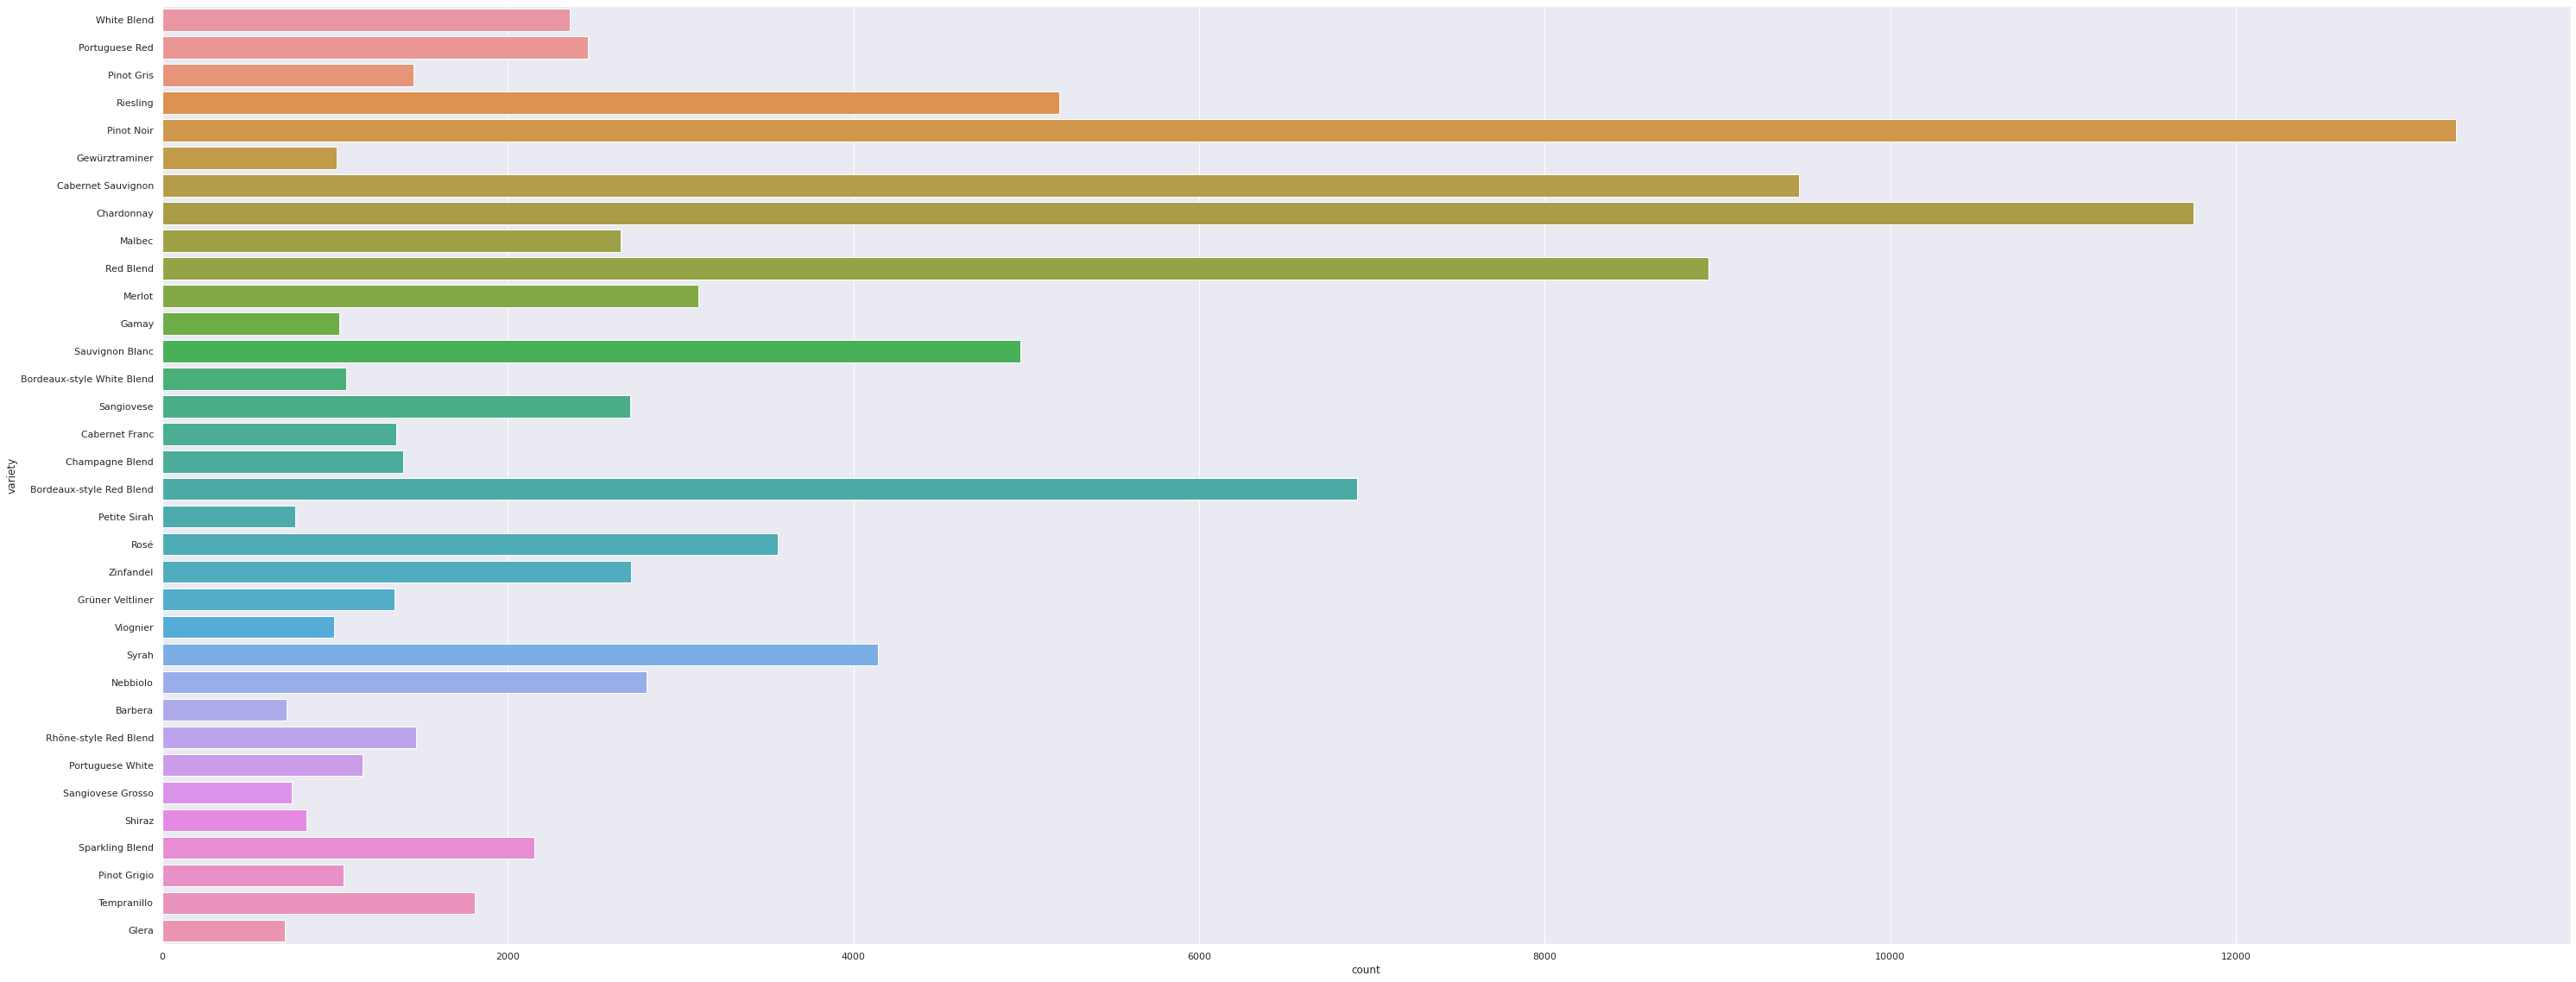

In [11]:
plt.figure(figsize=(50,20))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="variety", data=filterd_data)

In [12]:
data = filterd_data[['description', 'variety']]

In [13]:
labels = data['variety'].values
data_x = data['description'].values

X_train, X_test, y_train, y_test = train_test_split(data_x, labels, test_size=0.33, random_state=42)
y_train[0]

'White Blend'

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [15]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
labels = model.predict(X_test)

In [16]:
labels.shape

(35675,)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype(str), labels.astype(str)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                   Barbera       0.00      0.00      0.00       252
  Bordeaux-style Red Blend       0.54      0.59      0.56      2250
Bordeaux-style White Blend       0.00      0.00      0.00       323
            Cabernet Franc       0.00      0.00      0.00       423
        Cabernet Sauvignon       0.42      0.65      0.51      3136
           Champagne Blend       0.00      0.00      0.00       444
                Chardonnay       0.37      0.97      0.54      3889
                     Gamay       0.00      0.00      0.00       339
            Gewürztraminer       0.00      0.00      0.00       320
                     Glera       0.00      0.00      0.00       254
          Grüner Veltliner       1.00      0.00      0.01       450
                    Malbec       1.00      0.00      0.00       845
                    Merlot       0.00      0.00      0.00      1032
                  Nebbiolo       0.86      0.21

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
